In [1]:
from src import *

2023-09-08 10:42:07.647711: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
agent = Agent(restaurant_array=[2,6,2], grid_size=100, randseed=25)

2023-09-08 10:42:10.451498: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
agent = Agent(restaurant_array=[2,6,2], grid_size=100, randseed=25, filename="models/model_n3_200")

In [4]:
episodios=17
episodios_terminados=1703
decay=0.999

agent.train(episodes=episodios, finished_episodes=episodios_terminados, batch_size=16, epsilon=1,
             epsilon_decay=decay, score_limit=190, log_limit=192, refresh_rate=1, verbose=False, display_rewards=False)

agent.save("models/model_n3_"+str(episodios_terminados+episodios))

episode: 1704/1720, score: 190.31, e: 0.18, actions: 200, couriers: 182, t: 51.21s
episode: 1705/1720, score: 190.90, e: 0.18, actions: 202, couriers: 177, t: 30.28s
episode: 1706/1720, score: 190.76, e: 0.18, actions: 206, couriers: 181, t: 22.73s
episode: 1707/1720, score: 190.56, e: 0.18, actions: 211, couriers: 186, t: 24.17s
episode: 1708/1720, score: 190.35, e: 0.18, actions: 202, couriers: 183, t: 22.52s
episode: 1709/1720, score: 190.33, e: 0.18, actions: 204, couriers: 184, t: 22.38s
episode: 1710/1720, score: 190.94, e: 0.18, actions: 209, couriers: 181, t: 23.41s
episode: 1711/1720, score: 190.08, e: 0.18, actions: 209, couriers: 179, t: 26.46s
episode: 1712/1720, score: 190.53, e: 0.18, actions: 212, couriers: 187, t: 25.97s
episode: 1713/1720, score: 190.65, e: 0.18, actions: 206, couriers: 182, t: 24.14s
episode: 1714/1720, score: 190.33, e: 0.18, actions: 205, couriers: 185, t: 23.14s
episode: 1715/1720, score: 190.94, e: 0.18, actions: 209, couriers: 181, t: 26.58s
epis

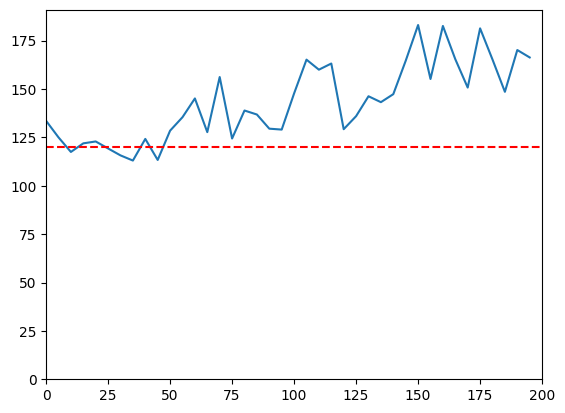

In [6]:
agent.rewards_graphic(n=5,mean=120, ylim=191)

In [7]:
agent.print_prediction([[0,0,0,0,0,0,0,1,0]])
# print(agent.model.predict([[0,1,0,100000,0,0,0,2,0]], verbose=0))
# agent.model.get_weights()[-1]

|      | Invo |  C1  |  C2  |  C3  |
|  C1  |-114254320.0000|  --  |-153851408.0000|-128771800.0000|
|  C2  |-215705680.0000|-102416992.0000|  --  |-127064792.0000|
|  C3  |-126361712.0000|-117972680.0000|-153855504.0000|  --  |


In [6]:
test_agent = Agent(restaurant_array=[2,6,2], grid_size=100, randseed=25)
test_agent.train(1000,epsilon_decay=1.0,train_model=False,log=False)

In [9]:
np.median(np.array(test_agent.reward_history))

-119.14946284720054

(array([  3.,  12.,  31.,  93., 201., 289., 228., 119.,  23.,   1.]),
 array([-206.42575921, -190.70963908, -174.99351895, -159.27739882,
        -143.56127869, -127.84515856, -112.12903843,  -96.41291829,
         -80.69679816,  -64.98067803,  -49.2645579 ]),
 <BarContainer object of 10 artists>)

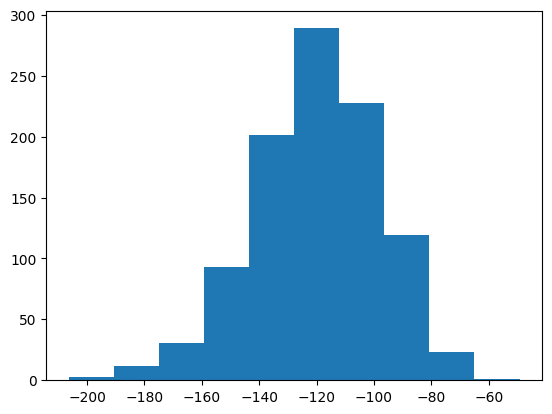

In [8]:
plt.hist(test_agent.reward_history)

In [ ]:
agent.reset()
get_memory_usage()

In [ ]:
agent.map.display_map_clusters()

In [ ]:
episodios_terminados = 0
rewards = agent.train(episodes=1, batch_size=16, epsilon=0.99**episodios_terminados, epsilon_decay=0.99)

In [16]:
agent.test_state([0,0,0,0,1,0,0,0,0])

[STATE]:  [[0], [0], [0], [0], [1], [0], [0], [0], [0]]
[ACTION]: C_0++, R:-1
[STATE]:  [[1], [0], [0], [0], [1], [0], [0], [0], [0]]
[ACTION]: C_0 -> C_1, R: 0.0525594901040716
score: -0.95


In [ ]:
plt.plot(rewards)

In [ ]:
agent.save("model")

In [ ]:
agent.model.get_weights()[-1]